## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data=pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"]) #using a outer join on the mouse id column 
# Display the data table for preview
all_data.head() #.head is a method that displays your dataframe

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [5]:
# Checking the number of mice.
mice=all_data["Mouse ID"].value_counts() 
number_of_mice=len(mice)
number_of_mice #test

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = all_data.loc[all_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice #test

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice_id=pd.DataFrame(duplicate_mice)
all_duplicate_mice_id #test

0
0  g989

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = all_data[all_data["Mouse ID"].isin(duplicate_mice)==False] #isin will return a dataframe of booleans showing whether each element in the DataFrame is contained in values.
clean_df #test

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice #test; number of mice drops from 249 to 248, therefore duplicate mouse has been successfully removed

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#I will create a table for each method instead of doing the .describe method so I can piece each value together when needed

regimen_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"] #SEM= standard error of the mean 
regimen_sem

#Now to put all the values together into one dataframe using the pd.Dataframe method:
summary_statistics = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_statistics #test if the lines above have been achieved

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [14]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
single_group_by=clean_df.groupby("Drug Regimen")
second_summary_statistics=single_group_by.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
second_summary_statistics #test

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements per Treatment')

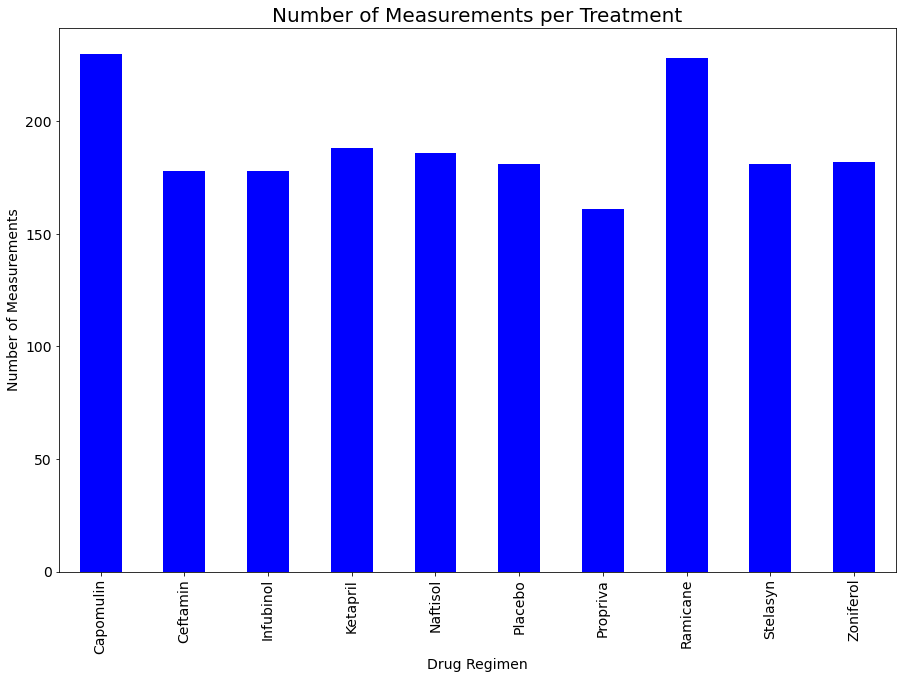

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
number_of_measurements= all_data.groupby(["Drug Regimen"]).count()["Timepoint"] 


plot= number_of_measurements.plot.bar(figsize=(15,10), color='b',fontsize = 14)
number_of_measurements 
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Measurements",fontsize = 14)
plt.title("Number of Measurements per Treatment",fontsize = 20)

# plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")
# plt.tight_layout()
# plt.show()


In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
